# Maximum Stress Criterion

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
sp.init_printing()
import ipywidgets as ipw

<img src="farfieldstress.png" width="500"/>

The figure above shows stresses in the vicinity of crack tip. $\theta$ depicts crack propagation angle and $r$ represents the radius of fracture propagation segment.

In [2]:
r = sp.Symbol('r', nonnegative = True)
theta = sp.Symbol(r'\theta', nonnegative = True)
K_I = sp.Symbol('K_I', nonnegative = True)
K_II = sp.Symbol('K_{II}', nonnegative = True)
T = sp.Symbol('T', nonnegative = True)
sigma_x =  sp.Symbol(r'\sigma_x', nonnegative = True)
eta =  sp.Symbol(r'\eta', nonnegative = True)
sigma_z =  sp.Symbol(r'\sigma_z', nonnegative = True)
tau_fps = sp.Symbol(r'\tau_\mathrm{fps}')
a = sp.Symbol('a', nonnegative = True)
beta = sp.Symbol(r'\beta', nonnegative = True)
f = sp.Symbol(r'f', nonnegative = True)
eta

## Stress Intensity Factors
In this section, the far field stresses will be represented in terms of Stress Intensity factors. The schematics assume that we have a far field stress in the horizontal direction represented as $\sigma_x$ with respect to an angled crack represent by angle $\beta$ with respect to this horizontal boundary condition.The stress field in this case will be given as:
\begin{align}
\sigma_{ij} = 
\left[
\begin{array}{cc}
\sigma_{X} & \eta \sigma_{X} \\
\eta \sigma_{X} & 0
\end{array}
\right]
\end{align}
and the rotated stress field depicted in figure below is shown as:
\begin{align}
\sigma^{\beta}_{ij} = 
\left[
\begin{array}{cc}
\sigma_{n} & \sigma_{np} \\
\sigma_{np} & \sigma_{p}
\end{array}
\right]
\end{align}
However, to transform the global stress field into local with respect to the angle $\beta$ can be done with the help of rotation matrix. Hence,
\begin{align}
R_{\beta} = 
\left[
\begin{array}{cc}
\cos \beta & -\sin \beta \\
\sin \beta & \cos \beta
\end{array}
\right]
\end{align}
\begin{align}
\sigma^{\beta}_{ij} = 
\left[
\begin{array}{cc}
\sigma_{n} & \sigma_{np} \\
\sigma_{np} & \sigma_{p}
\end{array}
\right] = 
R_{\beta}^T \sigma_{ij} R_{\beta}
\end{align}
In order to convert the local stress field into SIF's to take into account crack length: 
\begin{gather*}
K_I = \sqrt{\pi a} \sigma_{n}\\
K_{II} = \sqrt{\pi a} \sigma_{np}
\end{gather*}
Here, $K_I$ represents the mode I opening failure whereas, $K_{II}$ depicts the sliding failure. The positive sign of $K_I$ highlights stress as tension where negative sign shows compression. Similarly, negative sign of $K_{II}$ represents stress in opposite direction. In the case of pure mode I failure, $\beta$ is $90°$ whereas for failure along pure mode II $\beta = 0°$

<img src="transformationofstressfield.png" width="300"/>

In [3]:
s_b, c_b = sp.symbols('s_b, c_b')
s_b

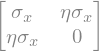

In [4]:
sigma_ij = sp.Matrix([[sigma_x, eta * sigma_x],
                    [ eta * sigma_x, 0]])
sigma_ij

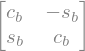

In [5]:
R_beta = sp.Matrix([[c_b, -s_b],
                    [s_b, c_b]])
R_beta

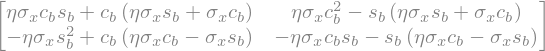

In [6]:
sigma_beta_ij = R_beta.T * sigma_ij * R_beta
sigma_beta_ij

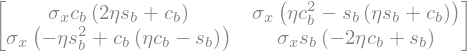

In [7]:
sigma_beta_ij_sim_ = sp.simplify(sigma_beta_ij)
sigma_beta_ij_sim_

In [8]:
K_I = sp.sqrt(sp.pi * a) * sigma_beta_ij_sim_[0,0]
K_II  = sp.sqrt(sp.pi * a) * sigma_beta_ij_sim_[1,0]
K_I, K_II

In [9]:
#a = sp.simplify(SIF_field)
#l = (Rot.T).inv() * a * Rot.inv()
#l

In [10]:
#sp.simplify(l)

In [11]:
#params1 = {beta:45*np.pi/180}

In [12]:
#K_I_ = K_I#.subs(params)
#K_II_ = K_II#.subs(params)
#K_I_, K_II_

In [13]:
## Representation of sin and cos components as s_t and c_t for simplicity.
s_t, c_t = sp.symbols('s_t,c_t')
#T_t = sp.Matrix([[c_t, -s_t],[s_t, c_t]])
#T_t

In [14]:
cs_theta = sp.Matrix([c_t, s_t])
cs_theta

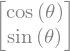

In [15]:
cs_theta_ = sp.Matrix([sp.cos(theta), sp.sin(theta)])
cs_theta_

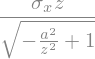

In [16]:
iota = sp.Symbol(r'\iota')
e = sp.Symbol(r'e')
z = sp.Symbol('z')
Z = (sigma_x * z)/(sp.sqrt(1 - (a/z)**2))
Z

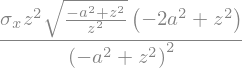

In [17]:
Z_p = sp.simplify(Z.diff(z))
Z_p

In [18]:
z_ = a + r*sp.exp(1)**(iota * theta)
z_

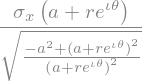

In [21]:
Z_ = Z.subs(z,z_)
sp.simplify(Z_)

In [ ]:
as a**2 >> a*r*sp.exp(1)**(iota * theta) >> r**2:
    

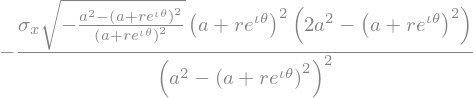

In [22]:
Z_p_ = Z_p.subs(z,z_)
sp.simplify(Z_p_)

## Stress at the Crack tip
Dominant term for stresses can be obtained as:
\begin{gather*}
\sigma^{tip}_{ij} = \frac{\left[ K_I S_{ij}^I(\theta) + K_{II} S_{ij}^{II}(\theta) \right]}{\sqrt{2\pi r}} = 
\left[
\begin{array}{cc}
\sigma_{x} & \sigma_{xy} \\
\sigma_{xy} &  \sigma_{y}
\end{array}
\right]
\end{gather*}
where $K_I$, $K_{II}$ represents the Stress Intensity Factors for Mode I and Mode II failures and $S^I_{ij}(\theta)$ , $S_{ij}^{II}(\theta)$ depicts the Angular functions for Mode I and Mode II which are given as:
Angular functions for Mode I:
\begin{align}
S^{I} = 
\left[
\begin{array}{cc}
S^{I}_{11} & S^{I}_{12} \\
S^{I}_{12} &  S^{I}_{22}
\end{array}
\right] =
\left[
\begin{array}{cc}
2 \cos\frac{\theta}{2} -\cos\frac{\theta}{2} \left[ 1 + \sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right] & \cos\frac{\theta}{2}\sin\frac{\theta}{2}\cos\frac{3\theta}{2} \\
\cos\frac{\theta}{2}\sin\frac{\theta}{2}\cos\frac{3\theta}{2} &  \cos\frac{\theta}{2} \left[ 1 + \sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right]
\end{array}
\right] 
\end{align}
Angular functions for Mode II:
\begin{align}
S^{II} = 
\left[
\begin{array}{cc}
S^{II}_{11} & S^{II}_{12} \\
S^{II}_{12} &  S^{II}_{22}
\end{array}
\right] =
\left[
\begin{array}{cc}
-2 \sin\frac{\theta}{2} - \sin\frac{\theta}{2}\cos\frac{\theta}{2}\cos\frac{3\theta}{2} & \cos\frac{\theta}{2}\left[ 1 - \sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right] \\
\cos\frac{\theta}{2}\left[ 1 - \sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right] &  \sin\frac{\theta}{2}\cos\frac{\theta}{2}\cos\frac{3\theta}{2}
\end{array}
\right] 
\end{align}

<img src="Transformationfigure.png" width="500"/>

## Angular Function

In [ ]:
s_3t = 3 * s_t - 4 * s_t**3
c_3t = 4 * c_t**3 - 3 * c_t
S_I_11 = 2 * c_t - c_t * (1 + s_t * s_3t) 
S_I_22 = c_t * (1 + s_t * s_3t)
S_I_12 = c_t * s_t * c_3t
S_I = sp.Matrix([[S_I_11, S_I_12],[S_I_12, S_I_22]])
S_I_ = sp.simplify(S_I)
S_I_

In [ ]:
S_II_11 = - 2 * s_t - s_t * c_t * c_3t  
S_II_22 = s_t * c_t * c_3t
S_II_12 = c_t * (1 - s_t * s_3t)
S_II = sp.Matrix([[S_II_11, S_II_12],[S_II_12, S_II_22]])
S_II_ = sp.simplify(S_II)
S_II_

In [ ]:
c_t_h = sp.sqrt((1 + c_t)/2)
s_t_h = sp.sqrt((1 - c_t)/2)
s_t_h

In [ ]:
sigma_tip_ij = sp.Matrix([[K_I * S_I_[0,0] + K_II * S_II_[0,0], K_I * S_I_[0,1] + K_II * S_II_[0,1]],
                   [K_I * S_I_[0,1] + K_II * S_II_[0,1], K_I * S_I_[1,1] + K_II * S_II_[1,1]]])
sigma_tip_ij_ = sp.simplify(sigma_tip_ij.subs(c_t, c_t_h).subs(s_t, s_t_h))
sigma_tip_ij_

## Tip Stress Transformation
To transform from cartesian to polar coordinates, Transformation Matrix will be taken into account i.e.:
\begin{align}
R_{\theta} = 
\left[
\begin{array}{cc}
\cos \theta & -\sin \theta \\
\sin \theta &  \cos \theta
\end{array} \right]
\end{align}
Now, in order to transform from cartesian to polar the following transformation will be done. i.e.:
\begin{align}
\sigma^{tip(\theta)}_{ij} = R_{\theta}^T \sigma^{tip}_{ij} R_{\theta} =
\left[
\begin{array}{cc}
\sigma_{\rho} & \sigma_{\rho \theta} \\
\sigma_{\rho \theta} &  \sigma_{\theta}
\end{array} \right]
\end{align}

In [ ]:
R_theta = sp.Matrix([[cs_theta[0], -cs_theta[1]],[cs_theta[1], cs_theta[0]]])
R_theta

In [ ]:
sig_tip_theta_ij = R_theta.T * sigma_tip_ij_ * R_theta
sig_tip_theta_ij_ = sp.simplify(sig_tip_theta_ij)
sig_tip_theta_ij_;

Replacing sine component with cosine for transforming the equation into a single trignometric ratio for simpicity.

In [ ]:
s_t_ = sp.sqrt(1 - c_t**2)
sig_tip_theta_ij_sub = sig_tip_theta_ij_.subs(s_t, s_t_)
sig_tip_theta_ij_sub;

In [ ]:
sig_tip_theta_ij_sim = sp.simplify(sig_tip_theta_ij_sub)
sig_tip_theta_ij_sim;

Solving the stress field to calculate angle $\theta$ following the Maximum Tangential Stress Theory. According to the Maximum Tangental Stress Theory, when the stress $\sigma_{\theta}$ is maximum depicting principal stress than $\sigma_{\rho \theta}$ becomes:  
\begin{gather*}
\sigma_{\rho \theta} = 0
\end{gather*}

In [ ]:
#sig_tip_theta_sim[1,0].subs(params)

In [ ]:
params = {eta : 0}
theta_sigma_xy0 = sp.solve(sig_tip_theta_ij_sim[1,0].subs(params), c_t)
theta_sigma_xy0

In [ ]:
params_ = {sigma_x : 1, eta : 0.5} 
theta_sigma_xy1 = sp.solve(sig_tip_theta_ij_sim[1,0].subs(params_), c_t)
theta_sigma_xy1

In [ ]:
#sp.simplify(theta_sigma_xy1[2])

In [ ]:
params_2 = {sigma_x : 1, eta : 1}
theta_sigma_xy2 = sp.solve(sig_tip_theta_ij_sim[1,0].subs(params_2), c_t)
theta_sigma_xy2

In [ ]:
theta_sig_xy0 = theta_sigma_xy0[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_sig_xy0_ = sp.acos(theta_sig_xy0)
get_theta_sig_xy0 = sp.lambdify((beta), theta_sig_xy0_, 'numpy')
get_theta_sig_xy0

In [ ]:
theta_sig_xy1 = theta_sigma_xy1[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_sig_xy1_ = sp.acos(theta_sig_xy1)
get_theta_sig_xy1 = sp.lambdify((beta), theta_sig_xy1_, 'numpy')
get_theta_sig_xy1

In [ ]:
theta_sig_xy2 = theta_sigma_xy2[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_sig_xy2_ = sp.acos(theta_sig_xy2)
get_theta_sig_xy2 = sp.lambdify((beta), theta_sig_xy2_, 'numpy')
get_theta_sig_xy2

In [ ]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
beta_0 = np.linspace(0 * np.pi/180, 90 * np.pi/180, 100)
#beta_1 = np.linspace(0, 90 * np.pi/180, 100)
#beta_2 = np.linspace(0, 90 * np.pi/180, 100)
theta_sig_xy0 = get_theta_sig_xy0(beta_0)
theta_sig_xy1 = get_theta_sig_xy1(beta_0)
theta_sig_xy2 = get_theta_sig_xy2(beta_0)
ax1.plot(beta_0 * 180/np.pi, theta_sig_xy0 * 180/ np.pi, color='blue', lw=2, label = r'$\eta = 0$')
ax1.plot(beta_0 * 180/np.pi, theta_sig_xy1 * 180/ np.pi, color='red', lw=2, label = r'$\eta = 0.5$')
ax1.plot(beta_0 * 180/np.pi, theta_sig_xy2 * 180/ np.pi, color='green', lw=2, label = r'$\eta = 1$')
ax1.set_xlabel(r'$\beta$'); ax1.set_ylabel(r'$\theta$')
ax1.legend()
_.savefig("pplotMTSvaryingeta.pdf", bbox_inches='tight')

In [ ]:
theta_sig_xy1 * 180/ np.pi 

In [ ]:
theta_sig_xy2 * 180/ np.pi 

In [ ]:
beta_0 * 180/np.pi

In [ ]:
params_x2 = {sigma_x : 2, eta : 0.5}
theta_sigma_x2 = sp.solve(sig_tip_theta_ij_sim[1,0].subs(params_x2), c_t)
theta_sigma_x2

In [ ]:
params_x3 = {sigma_x : 3, eta : 0.5}
theta_sigma_x3 = sp.solve(sig_tip_theta_ij_sim[1,0].subs(params_x3), c_t)
theta_sigma_x3

In [ ]:
beta = sp.Symbol(r'\beta', nonnegative = True)
theta_sig_x2 = theta_sigma_x2[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_sig_x2_ = sp.acos(theta_sig_x2)
get_theta_sig_x2 = sp.lambdify((beta), theta_sig_x2_, 'numpy')
get_theta_sig_x2

In [ ]:
theta_sig_x3 = theta_sigma_x3[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_sig_x3_ = sp.acos(theta_sig_x3)
get_theta_sig_x3 = sp.lambdify((beta), theta_sig_x3_, 'numpy')
get_theta_sig_x3

In [ ]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
beta_ = np.linspace(0, 90 * np.pi/180, 100)
theta_sig_x1 = get_theta_sig_xy1(beta_)
theta_sig_x2 = get_theta_sig_x2(beta_)
theta_sig_x3 = get_theta_sig_x3(beta_)
ax1.plot(beta_ * 180/np.pi, theta_sig_x1 * 180/ np.pi, color='blue', lw=2, label = r'$\eta = 0.5, \sigma_X = 1$')
ax1.plot(beta_ * 180/np.pi, theta_sig_x2 * 180/ np.pi, color='red', lw=2, label = r'$\eta = 0.5, \sigma_X = 2$')
ax1.plot(beta_ * 180/np.pi, theta_sig_x3 * 180/ np.pi, color='green', lw=2, label = r'$\eta = 0.5, \sigma_X = 3$')
ax1.set_xlabel(r'$\beta$'); ax1.set_ylabel(r'$\theta$')
ax1.legend()
_.savefig("plotMTSvaryingsigma_x.pdf", bbox_inches='tight')

## Mixity Parameter

Mode mixity is given as: 
\begin{gather*}
    M_e = \frac{2}{\pi} \arctan \left(\frac{K_I}{K_{II}} \right)
\end{gather*}
where $M_e = 0$ depicts the pure mode II failure and $M_e = 1$ highlights a pure mode I failure.

In [ ]:
beta = sp.Symbol(r'\beta', nonnegative = True)
eta = sp.Symbol(r'\eta', nonnegative = True)

In [ ]:
sigma_ij = sp.Matrix([[sigma_x, eta * sigma_x], #eta * sigma_x
                      [-eta * sigma_x, 0]])
sigma_ij

In [ ]:
R_beta = sp.Matrix([[c_b, -s_b],
                    [s_b, c_b]])
R_beta

In [ ]:
sigma_beta_ij = R_beta.T * sigma_ij * R_beta
sigma_beta_ij

In [ ]:
sigma_beta_ij_sim_ = sp.simplify(sigma_beta_ij)
sigma_beta_ij_sim_

In [ ]:
K_I = sp.sqrt(sp.pi * a) * sigma_beta_ij_sim_[0,0]
K_II  = sp.sqrt(sp.pi * a) * sigma_beta_ij_sim_[1,0]
K_I, K_II

In [ ]:
M_e = (2 / sp.pi) * sp.atan(K_I/K_II)
M_e_eta0 = sp.Abs(M_e.subs(s_b, sp.sin(beta)).subs(c_b, sp.cos(beta)))
M_e_eta0

In [ ]:
get_M_e = sp.lambdify((eta, beta), M_e_eta0, 'numpy')
get_M_e

In [ ]:
theta_sig_xy0 = theta_sigma_xy0[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin( beta)) #90 * np.pi / 180 - 
theta_sig_xy0_ = sp.acos(theta_sig_xy0)
get_theta_sig_xy0_ = sp.lambdify((beta), theta_sig_xy0_, 'numpy')
get_theta_sig_xy0_

In [ ]:
theta_sig_xy1 = theta_sigma_xy1[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_sig_xy1_ = sp.acos(theta_sig_xy1)
get_theta_sig_xy1_ = sp.lambdify((beta), theta_sig_xy1_, 'numpy')
get_theta_sig_xy1_

In [ ]:
theta_sig_xy2 = theta_sigma_xy2[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_sig_xy2_ = sp.acos(theta_sig_xy2)
get_theta_sig_xy2_ = sp.lambdify((beta), theta_sig_xy2_, 'numpy')
get_theta_sig_xy2_

In [ ]:
_, (ax1) = plt.subplots(1, 1, figsize=(6,4))
eta_0 = 0
eta_05 = 0.5
eta_1 = 1
beta_0 = np.linspace(0, 90 * np.pi/180, 100)
theta_sig_xy0 = get_theta_sig_xy0_(beta_0)
theta_sig_xy1 = get_theta_sig_xy1_(beta_0)
theta_sig_xy2 = get_theta_sig_xy2_(beta_0)
M_e_xy0 = get_M_e(eta_0,beta_0)
M_e_xy1 = get_M_e(eta_05, beta_0)
M_e_xy2 = get_M_e(eta_1, beta_0)
ax1.plot(M_e_xy0, theta_sig_xy0 * 180/ np.pi, color='blue', lw=2, label = r'$\eta = 0, \sigma_X = 1$')
ax1.plot(M_e_xy1, theta_sig_xy1 * 180/ np.pi, color='red', lw=2, label = r'$\eta = 0.5, \sigma_X = 1$')
ax1.plot(M_e_xy2, theta_sig_xy2 * 180/ np.pi, color='yellow', lw=2, label = r'$\eta = 1, \sigma_X = 1$')
ax1.set_xlabel(r'$M^e$'); ax1.set_ylabel(r'$\theta$')
ax1.legend()
_.savefig("thetaMe.pdf", bbox_inches='tight')

In [ ]:
theta_sig_xy1 * 180/ np.pi

In [ ]:
M_e_xy2

In [ ]:
M_e_xy1

In [ ]:
M_e_xy0

In [ ]:
beta_0 * 180/np.pi

## Normalized Parameters

The critical mode I stress intensity factor is given as:
\begin{gather*}
    K_{Ic} = \sigma_X \sqrt{\pi a}
\end{gather*}
Now, the stress intensity factors will be normalized with respect to the $K_{Ic}$ to visualize the failure locus.

In [ ]:
K_Ic = sigma_x * sp.sqrt( sp.pi * a)
K_Ic

In [ ]:
beta = sp.Symbol(r'\beta', nonnegative = True)
eta = sp.Symbol(r'\eta', nonnegative = True)

In [ ]:
sigma_ij = sp.Matrix([[sigma_x, eta * sigma_x],
                    [ -eta * sigma_x, 0]])
sigma_ij

In [ ]:
R_beta = sp.Matrix([[c_b, -s_b],
                    [s_b, c_b]])
R_beta

In [ ]:
sigma_beta_ij = R_beta.T * sigma_ij * R_beta
sigma_beta_ij

In [ ]:
sigma_beta_ij_sim_ = sp.simplify(sigma_beta_ij)
sigma_beta_ij_sim_

In [ ]:
K_I = sp.sqrt(sp.pi * a) * sigma_beta_ij_sim_[0,0]
K_II  = sp.sqrt(sp.pi * a) * sigma_beta_ij_sim_[1,0]
K_I, K_II

In [ ]:
Norm_K_I = K_I / K_Ic
Norm_K_I_ = Norm_K_I.subs(s_b, sp.sin(beta)).subs(c_b, sp.cos(beta))
Norm_K_I_

In [ ]:
get_Norm_K_I = sp.lambdify((eta, beta), Norm_K_I_, 'numpy')
get_Norm_K_I

In [ ]:
Norm_K_II = K_II / K_Ic
Norm_K_II_ = sp.Abs(Norm_K_II.subs(s_b, sp.sin(beta)).subs(c_b, sp.cos(beta)))
Norm_K_II_

In [ ]:
get_Norm_K_II = sp.lambdify((eta, beta), Norm_K_II_, 'numpy')
get_Norm_K_II

In [ ]:
_, (ax1) = plt.subplots(1, 1, figsize=(6,4))
eta_0 = 0
eta_05 = 0.5
eta_1 = 1
beta_ = np.linspace(0, 90 * np.pi/180, 100)
K_I_K_Ic = get_Norm_K_I(eta_0, beta_)
K_II_K_Ic = get_Norm_K_II(eta_0, beta_)
K_I_K_Ic_ = get_Norm_K_I(eta_05, beta_)
K_II_K_Ic_ = get_Norm_K_II(eta_05, beta_)
K_I_K_Ic_1 = get_Norm_K_I(eta_1, beta_)
K_II_K_Ic_1 = get_Norm_K_II(eta_1, beta_)
ax1.plot(K_I_K_Ic, K_II_K_Ic, color='blue', lw=2, label = r'$\eta = 0, \sigma_X = 1$')
ax1.plot(K_I_K_Ic_, K_II_K_Ic_, color='red', lw=2, label = r'$\eta = 0.5, \sigma_X = 1$')
ax1.plot(K_I_K_Ic_1, K_II_K_Ic_1, color='yellow', lw=2, label = r'$\eta = 1, \sigma_X = 1$')
ax1.set_xlabel(r'$K_{If}/K_{Ic}$'); ax1.set_ylabel(r'$K_{IIf}/K_{Ic}$')
ax1.legend()
_.savefig("Failurelocus.pdf", bbox_inches='tight')

## Variation Of SIFs against $\beta$

In [ ]:
params = {sigma_x : 1, a : 1}
K_I_ = K_I.subs(params).subs(s_b, sp.sin(beta)).subs(c_b, sp.cos(beta))
K_I_

In [ ]:
K_II_ = sp.Abs(K_II.subs(params).subs(s_b, sp.sin(beta)).subs(c_b, sp.cos(beta)))
K_II_

In [ ]:
get_K_I = sp.lambdify((eta, beta), K_I_, 'numpy')
get_K_I

In [ ]:
get_K_II = sp.lambdify((eta, beta), K_II_, 'numpy')
get_K_II

In [ ]:
_, (ax1) = plt.subplots(1, 1, figsize=(6,4))
eta_0 = 0
eta_05 = 0.5
eta_1 = 1
beta_ = np.linspace(0, 90 * np.pi/180, 100)
K_I_1 = get_K_I(eta_0, beta_)
K_I_2 = get_K_I(eta_05, beta_)
K_I_3 = get_K_I(eta_1, beta_)
ax1.plot(beta_ * 180/np.pi, K_I_1, color='blue', lw=2, label = r'$\eta = 0, \sigma_X = 1$')
ax1.plot(beta_ * 180/np.pi, K_I_2, color='red', lw=2, label = r'$\eta = 0.5, \sigma_X = 1$')
ax1.plot(beta_ * 180/np.pi, K_I_3, color='yellow', lw=2, label = r'$\eta = 1, \sigma_X = 1$')
ax1.set_xlabel(r'$\beta$'); ax1.set_ylabel(r'$K_{I}$')
ax1.legend()
_.savefig("KIbeta.pdf", bbox_inches='tight')

In [ ]:
_, (ax1) = plt.subplots(1, 1, figsize=(6,4))
eta_0 = 0
eta_05 = 0.5
eta_1 = 1
beta_ = np.linspace(0, 90 * np.pi/180, 100)
K_II_1 = get_K_II(eta_0, beta_)
K_II_2 = get_K_II(eta_05, beta_)
K_II_3 = get_K_II(eta_1, beta_)
ax1.plot(beta_ * 180/np.pi, K_II_1, color='blue', lw=2, label = r'$\eta = 0, \sigma_X = 1$')
ax1.plot(beta_ * 180/np.pi, K_II_2, color='red', lw=2, label = r'$\eta = 0.5, \sigma_X = 1$')
ax1.plot(beta_ * 180/np.pi, K_II_3, color='yellow', lw=2, label = r'$\eta = 1, \sigma_X = 1$')
ax1.set_xlabel(r'$\beta$'); ax1.set_ylabel(r'$K_{II}$')
ax1.legend()
_.savefig("KIIbeta.pdf", bbox_inches='tight')

In [ ]:
K_II_2

In [ ]:
beta_ * 180/np.pi

## R-Curve
The fracture of quasi-brittle materials can be depicted by an R-curve which is also termed as fracture resistance. R-Curve is an envelope of energy release rate. For quasi-brittle materials, R is an increasing and convex function. This curve may be dependent on specimen geometry and material. 
A figure shown below highlights that the convex envelope of R-curve serves as the limit for crack gorwth, beyond which the unstable crack grows.


<img src="Rcurve.png" width="500"/>

For an infinite size specimen, the energy release rate is given by:
\begin{gather*}
G = \frac{\sigma^2 \pi a f_1^2}{E}
\end{gather*}
where, $\sigma = \frac{Ps}{b^2}$ for three point bending beam, $a$, $E$ represent the crack length and the modulus of elasticity respectively. The term $f_1$ in $\alpha$ equation is a geometry factor for the stress intensity factor and its value is equal to 1.123 for three point beam.

In [ ]:
f_1 = sp.Symbol('f_1', nonnegative = True)
f_2 = sp.Symbol('f_2', nonnegative = True)
E = sp.Symbol('E', nonnegative = True)
alpha = sp.Symbol('alpha', nonnegative = True)
a_0 = sp.Symbol('a_0', nonnegative = True)
a_c = sp.Symbol('a_c', nonnegative = True)
pi = sp.Symbol(r'\pi', nonnegative = True)
D = sp.Symbol('D', nonnegative = True)
H_0 = sp.Symbol('H_0', nonnegative = True)
B = sp.Symbol('B', nonnegative = True)
P_max = sp.Symbol('P_max', nonnegative = True)
P = sp.Symbol('P', nonnegative = True)
S = sp.Symbol('S', nonnegative = True)
B = sp.Symbol('B', nonnegative = True)
a = sp.Symbol('a', nonnegative = True)
COD = sp.Symbol('COD', nonnegative = True)
K_Ic = sp.Symbol('K_{Ic}', nonnegative = True)

In [ ]:
params = {f_2 : 1.42, 
          E: 28900, #N/mm2
          P_max : 10, #N 
          D : 19, #mm
          H_0 : 3, #mm
          B : 76.2, #mm
          S : 304.8, #mm
          P : 120, #N
          pi : 3.14, 
          a_0: 16, #mm
          f_1: 1.123,
          COD : 0.0094, ##mm
          K_Ic : 26.3 #N/mm2
         }

In [ ]:
sigma_x = (P * S) / B**2
sigma_x_ = sigma_x.subs(params)
sigma_x_

In [ ]:
G = (sigma_x_ * pi * a * f_1**2)/E
G

In [ ]:
G_ = G.subs(params)
G_

In [ ]:
get_G = sp.lambdify((a), G_, 'numpy')
get_G

With reference to Shah, the Crack Mouth Opening Displacement can be calculated as follows:
\begin{gather*}
CMOD = \frac{4 \sigma f_2}{E}
\end{gather*}

In [ ]:
CMOD = (4 * sigma_x.subs(params) * f_2.subs(params)) / E.subs(params)
CMOD

For the case, when critical crack mouth opening displacement $CMOD_c$ is known from experiment, the crack opening displacement $COD$ can be obtained from the equation given by Jenq and Shah:
\begin{gather*}
COD = CMOD_c\left[\left(1 - \frac{a_0}{a}\right)^2 + \left(1.081 - 1.149 \left(\frac{a}{D}\right)\right)\left[\frac{a_0}{a} - \left(\frac{a_0}{a}\right)^2\right]\right]^{1/2} 
\end{gather*}
In order to obtain the $COD_c$ at the tip of the crack we will replace $x$ with $a_0$. 

In [ ]:
#COD = CMOD * sp.sqrt((1 - a_0/a)**2 + (1.081 - 1.149*(a/D))*(a_0/a - (a_0/a)**2))
#COD_ = COD.subs(params)
#a_ = alpha * a_0
#COD_a = COD_.subs(a, a_)
#COD_a

In order to obtain R-Curve the following equation is to be evaluated:
\begin{gather*}
R = \beta_2 \psi (a - a_0)^{d_{2}}
\end{gather*}
The value of $\psi$ is normally close to one, hence it can be ignored whereas to calculate factor $\beta_2$ two critical conditions have to be considered i.e. $K_I = K_{IC}$ and $COD = CTOD_c$. Therefore, with reference to Maximum Tangential Stress Criterion $K_{IC}$ will be calculated as:
\begin{gather*}
K_{Ic} = \sigma_x \sqrt{\pi a}
\end{gather*}

In [ ]:
#K_Ic = sigma_x_ * sp.sqrt( sp.pi * a)
#K_Ic_ = K_Ic.subs(a, a_)
#K_Ic_

With reference to Shah, the value of $\beta_2$ can be calculated as:
\begin{gather*}
\beta_2 = \frac {K_{Ic}^2 (\alpha a_0 - a_0)^{-d_2}}{E \left(1 - \frac{d_2 - \frac{\alpha - 1}{\alpha}}{d_1 - \frac{\alpha - 1}{\alpha}} \right)}
\end{gather*}
and the unknown terms $\alpha$, $d_{1,2}$ in the above equation can be obtained from:
\begin{gather*}
\alpha = \frac {\pi E^2 f_1^2 CTOD_c^2}{32 a_0 K_{Ic}^2 f_2^2} + \sqrt {\frac {\pi E^2 f_1^2 CTOD_c^2}{32 a_0 K_{Ic}^2 f_2^2} + 1} \\
d_{1,2} = \frac{1}{2} + \frac{\alpha - 1} {\alpha} \pm \sqrt{\left(\frac{1}{4} + \frac{\alpha - 1} {\alpha} - \left(\frac{\alpha - 1} {\alpha}\right)^2\right)}
\end{gather*}
where, $f_2$ is a geometry parameter ad is equal to 1.42 for three point bend beam. $\alpha$ is the precritical stable crack growth ($\alpha \geq 1$). It is equal to 1 for a pure brittle material whereas it is greater than 1 for quasi-brittle materials. 

In [ ]:
alpha = (pi * E**2 * f_1**2 * COD**2) / (32 * a_0 * K_Ic**2 * f_2**2) \
        + sp.sqrt((pi * E**2 * f_1**2 * COD**2) / (32 * a_0 * K_Ic**2 * f_2**2) + 1)
alpha_ = sp.simplify(alpha.subs(params))
alpha_

In [ ]:
d_1 = (1/2) + ((alpha_ - 1) / alpha_) + sp.sqrt(1/4 + (alpha_ - 1) / alpha_ - ((alpha_ - 1) / alpha_)**2)
d_2 = (1/2) + ((alpha_ - 1) / alpha_) - sp.sqrt(1/4 + (alpha_ - 1) / alpha_ - ((alpha_ - 1) / alpha_)**2)
d_1_ = d_1.subs(params)
d_2_ = d_2.subs(params)
d_2_, d_1_

In [ ]:
#get_d_1 = sp.lambdify((a), d_1_, 'numpy')
#get_d_1

In [ ]:
#get_d_2 = sp.lambdify((a), d_2_, 'numpy')
#get_d_2

In [ ]:
beta_2 = (K_Ic**2 * (alpha_ * a_0 - a_0)**-d_2) / (E * (1 - (d_2 - ((alpha_-1)/alpha_))/(d_1 - ((alpha_-1)/alpha_))))
beta_2_ = beta_2.subs(params)
beta_2_

In [ ]:
#get_beta_2 = sp.lambdify((a), beta_2_, 'numpy')
#get_beta_2

In [ ]:
R = beta_2_ * (a - a_0)**d_2
R_ = R.subs(params)
#sp.simplify(R_)
R_

In [ ]:
get_R = sp.lambdify((a), R_, 'numpy')
get_R

The value of R must not exceed its maximum value which is:
\begin{gather*}
R_{Ic} = \frac{K_{Ic}^2}{E}
\end{gather*}

In [ ]:
R_Ic = (K_Ic)**2 / E
#R_Ic_ =R_Ic.subs(a, a_c_).subs(params)
R_Ic_ = R_Ic.subs(params)
R_Ic_

In [ ]:
#get_R_Ic = sp.lambdify((s_b), R_Ic_, 'numpy')
#get_R_Ic

In [ ]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
a = np.linspace(16, 100, 100)
a_g = np.linspace(0, 100, 100)
R = get_R(a) 
#R_I_c = R_Ic_
G = get_G(a_g)
ax1.plot(a , R, color='orange', lw=2, label= 'R-curve')
ax1.plot(a_g , G, color='blue', lw=2, label= 'G')
#ax1.plot(a , R_I_c, color='yellow', lw=2)
ax1.set_xlabel(r'$a$'); ax1.set_ylabel(r'$G$')
ax1.legend()

In [ ]:
R

In [ ]:
G